In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:


bike = pd.read_csv('dc_bikes.csv')

In [5]:
# Initialize empty list called sample_means:

sample_means =[]

In [9]:
# Create a for loop that will loop 10,000 times
# In each iteration using the pandas method .sample() sample 100 windspeeds with replacement
# Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list

for i in range(10000):
    sample = bike['windspeed'].sample(n=100, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


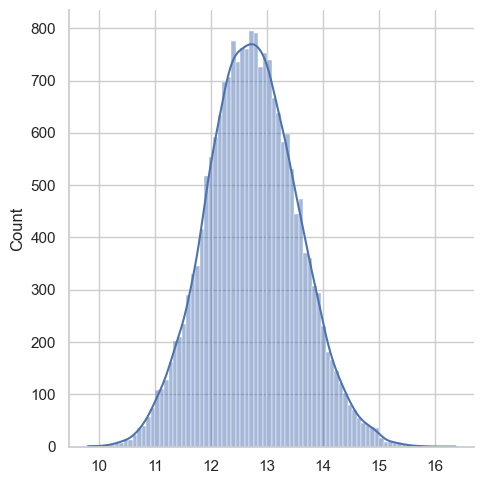

In [10]:
# Using sns.displot plot the distribution of the sample_means list:

sns.set(style="whitegrid")
sns.displot(sample_means, kde=True)

In [11]:
# Convert sample_means list to pandas Series

sample_means_series = pd.Series(sample_means)

In [12]:
sample_means_series

0        11.860273
1        12.100602
2        13.380436
3        11.890222
4        12.360160
           ...    
19995    12.290279
19996    11.700411
19997    12.520625
19998    11.580481
19999    12.050285
Length: 20000, dtype: float64

In [13]:
# Calculate the upper and lower limits of the confidence interval

upper_limit = sample_means_series.quantile(0.975)
lower_limit = sample_means_series.quantile(0.025)

print("Upper Limit (0.975):", upper_limit)
print("Lower Limit (0.025):", lower_limit)

Upper Limit (0.975): 14.389993675000001
Lower Limit (0.025): 11.160456325


/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


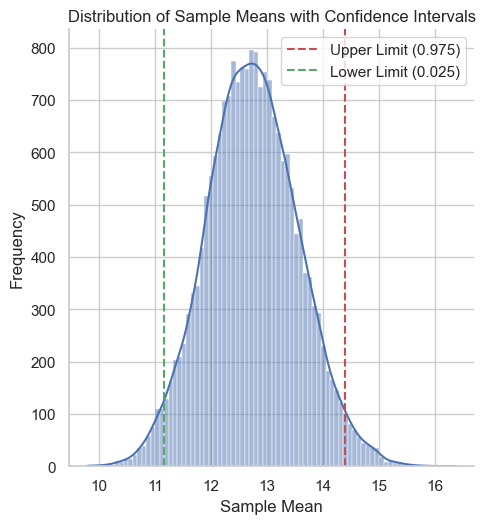

In [17]:
# Create a distribution plot using Seaborn
sns.set(style="whitegrid")
sns.displot(sample_means_series, kde=True)

# Add vertical lines for the upper and lower limits
plt.axvline(x=upper_limit, color='r', linestyle='--', label='Upper Limit (0.975)')
plt.axvline(x=lower_limit, color='g', linestyle='--', label='Lower Limit (0.025)')

plt.title("Distribution of Sample Means with Confidence Intervals")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# In this code, the .quantile() method is used to calculate the upper and lower 
# limits of the confidence interval based on the 97.5th and 2.5th percentiles, respectively. 
# The calculated limits are then printed, and vertical dashed lines are added to the distribution plot to 
# visually represent these limits.







In [19]:
# Calculate the standard deviation of the sample means

sample_means_std = sample_means_series.std()
sample_means_std

0.8167579149158584

In [20]:
# Calculate the z-value for the desired confidence level (e.g., 95% confidence)

confidence_level = 0.95
z_value = np.abs(np.percentile(sample_means_series, (1 + confidence_level) / 2) - sample_means_series.mean()) / sample_means_std

# Calculate the upper and lower limits of the confidence interval using the z-value formula

sample_size = len(sample_means_series)
upper_limit = sample_means_series.mean() + z_value * (sample_means_std / np.sqrt(sample_size))
lower_limit = sample_means_series.mean() - z_value * (sample_means_std / np.sqrt(sample_size))

print("Upper Limit (Z-value formula):", upper_limit)
print("Lower Limit (Z-value formula):", lower_limit)

Upper Limit (Z-value formula): 12.757674535212697
Lower Limit (Z-value formula): 12.731729620787306
